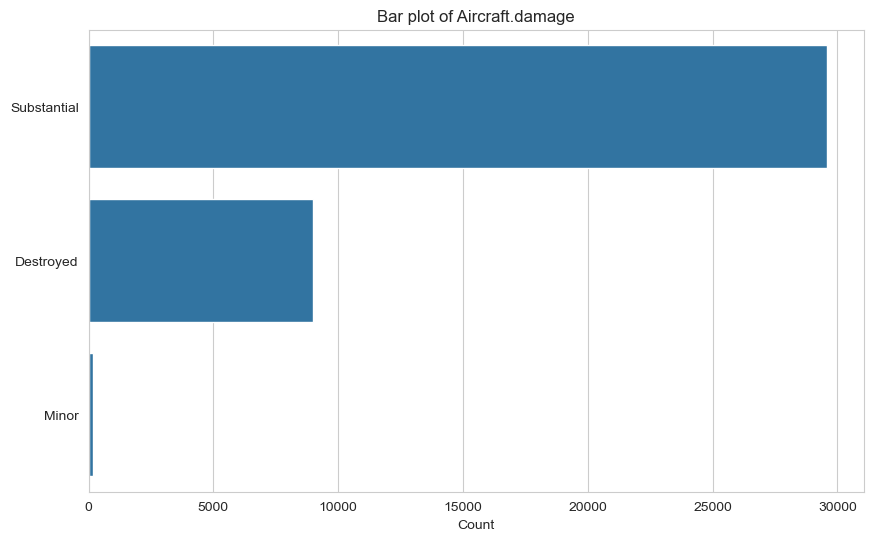

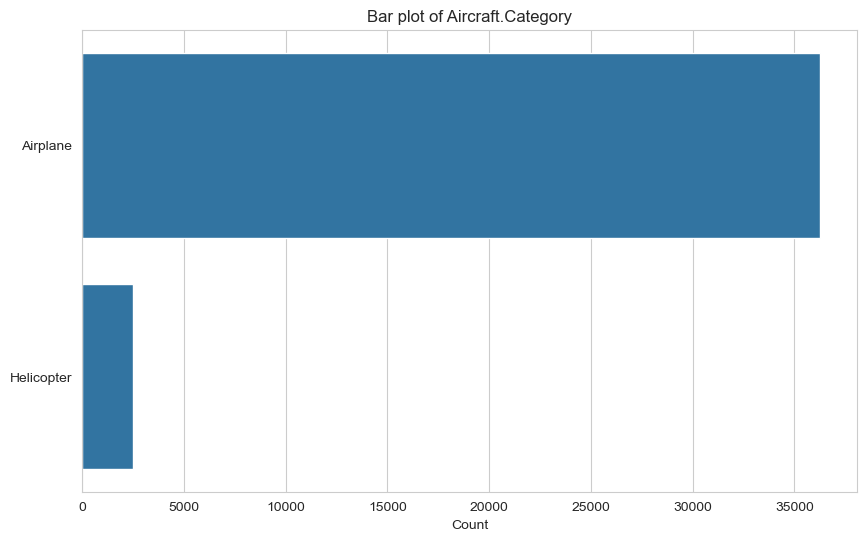

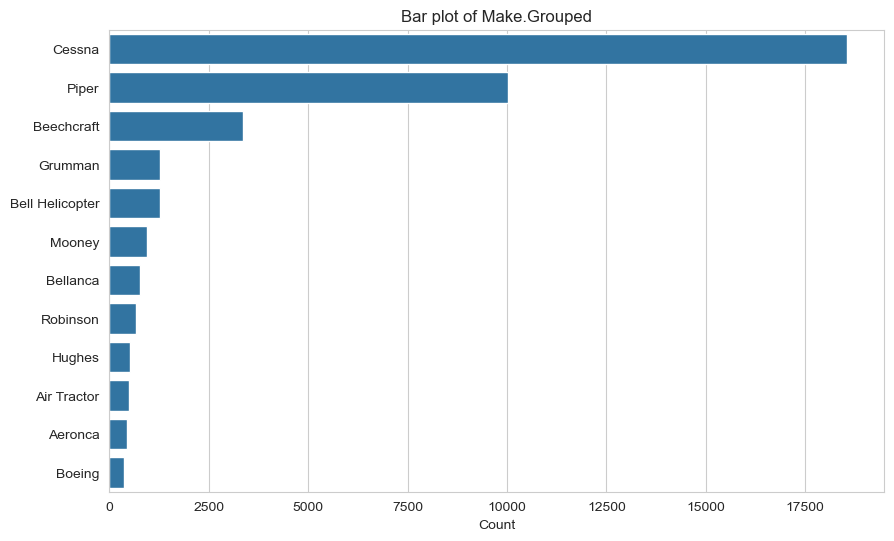

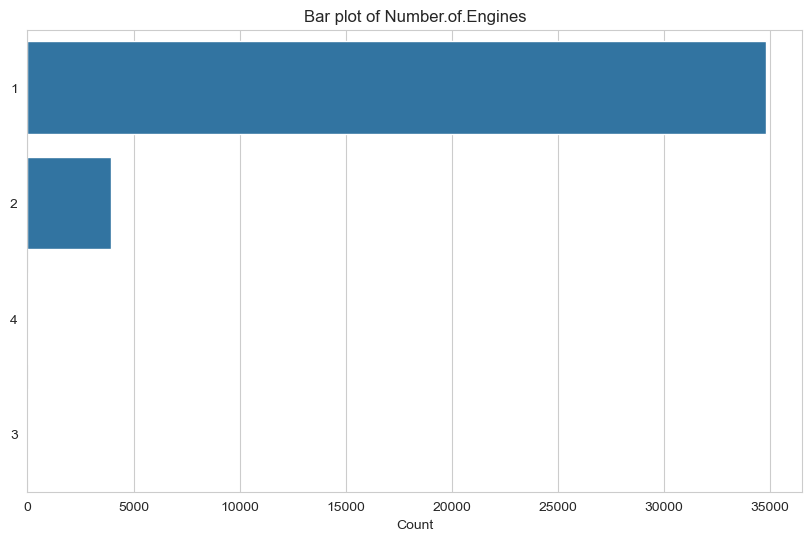

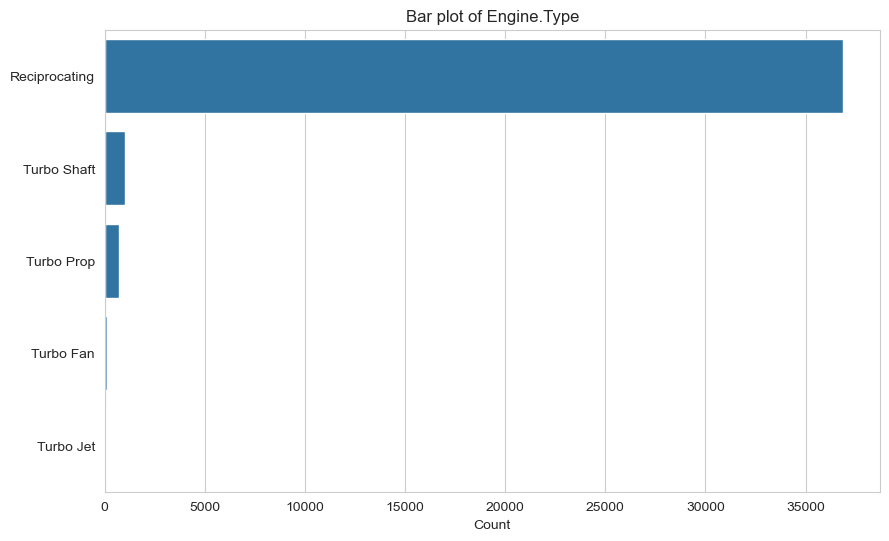

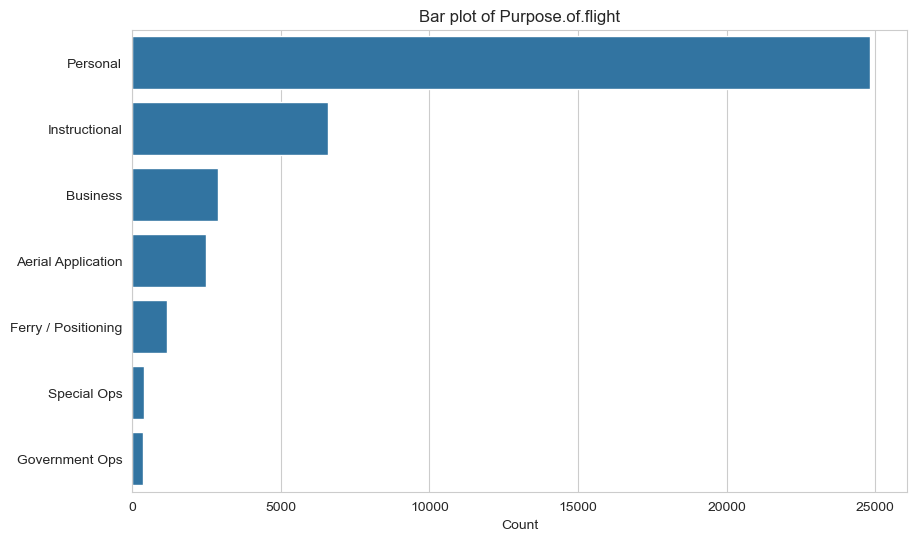

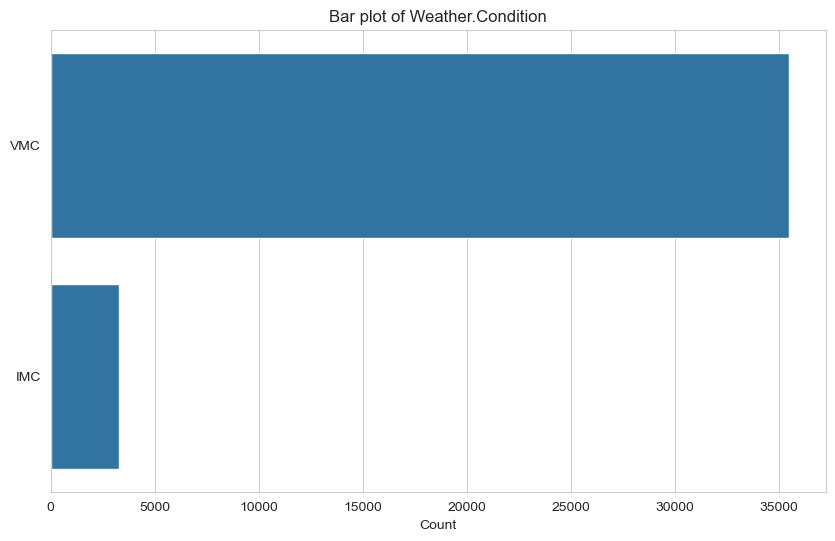

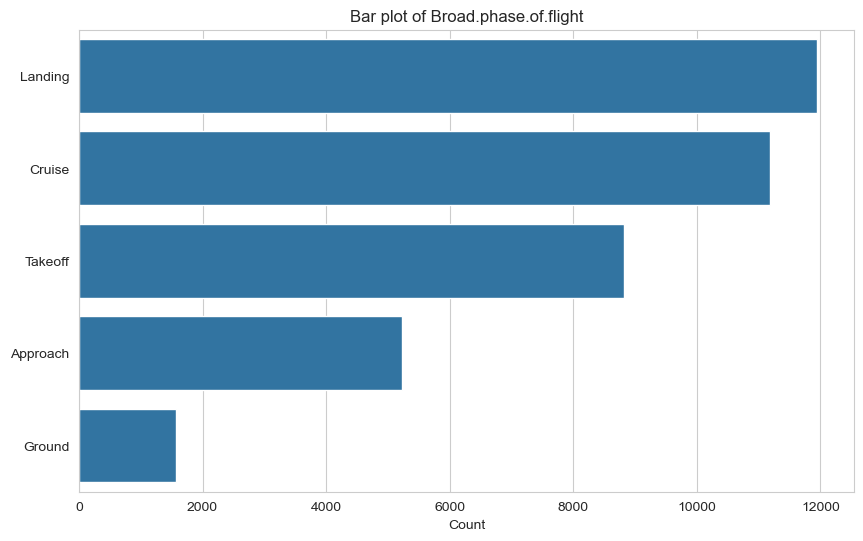

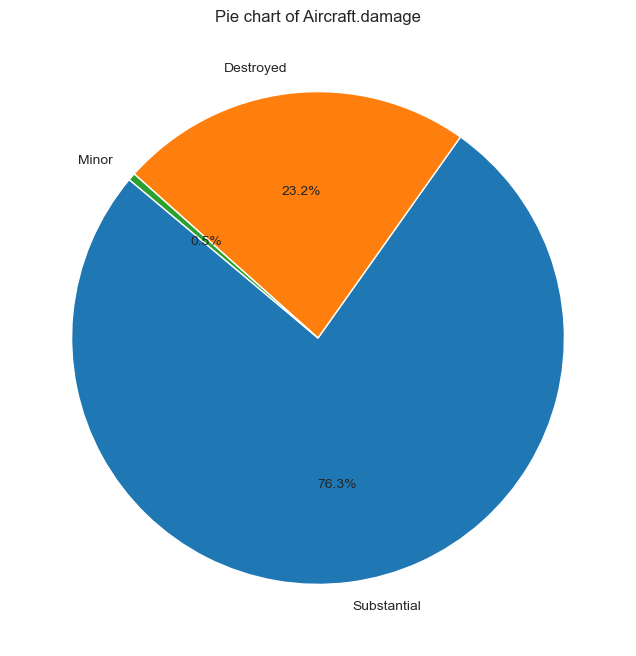

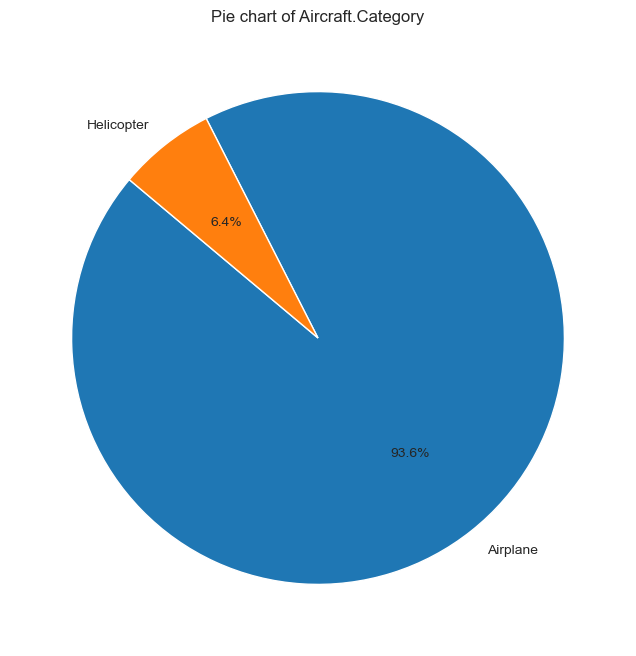

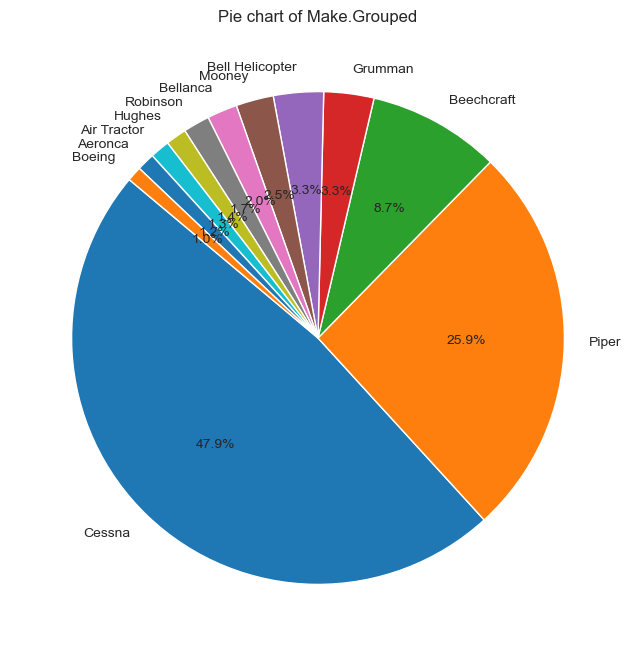

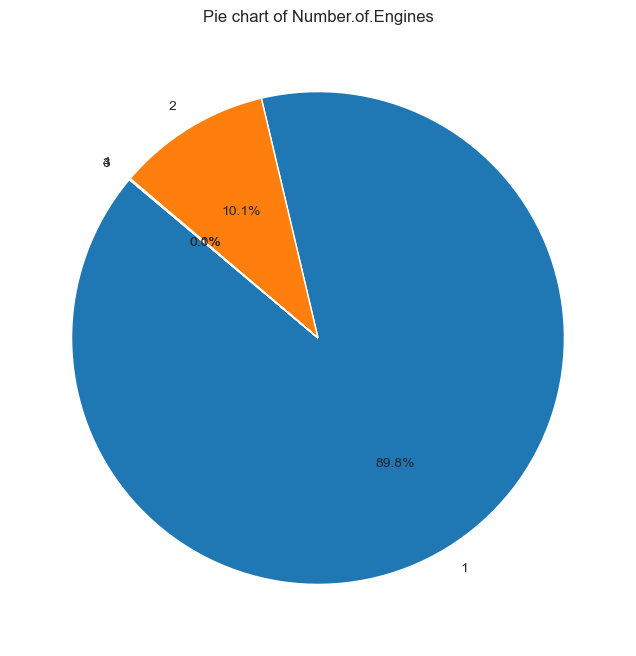

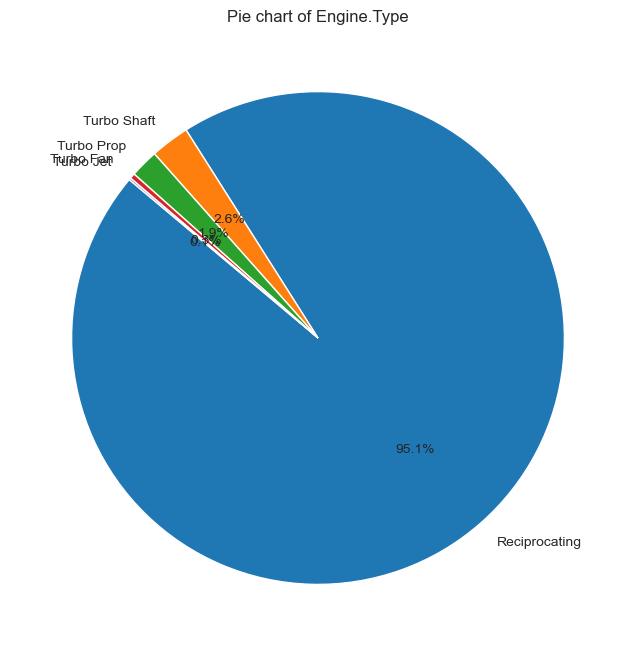

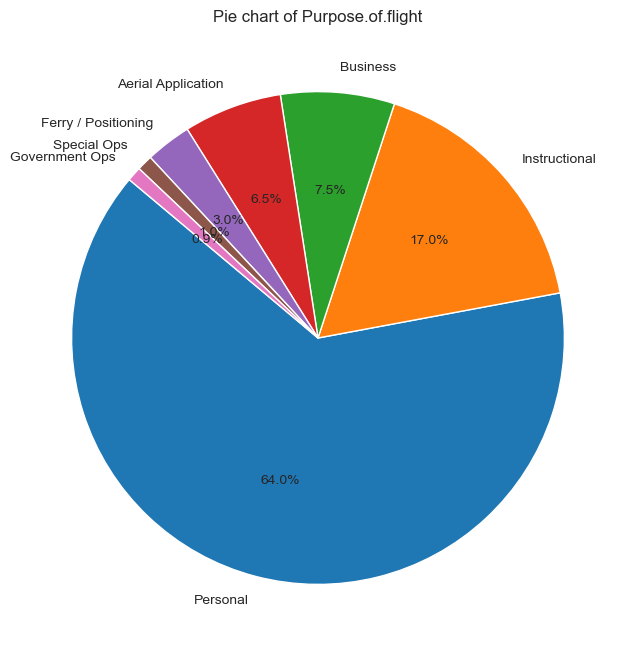

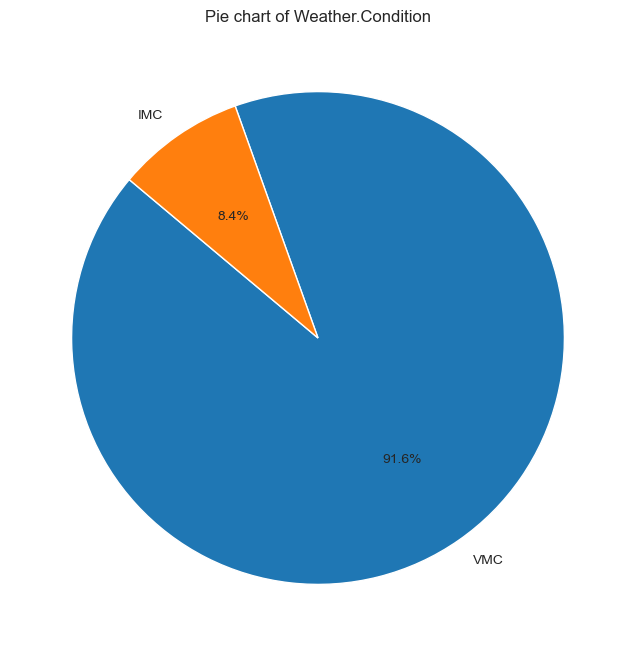

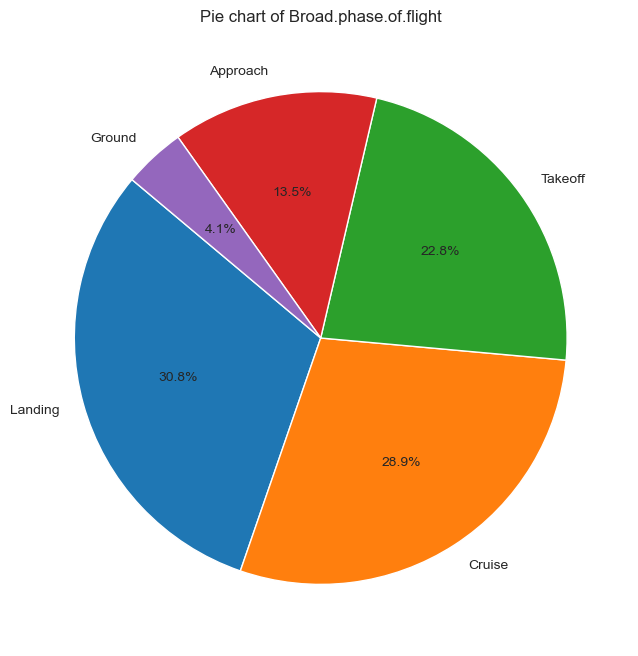

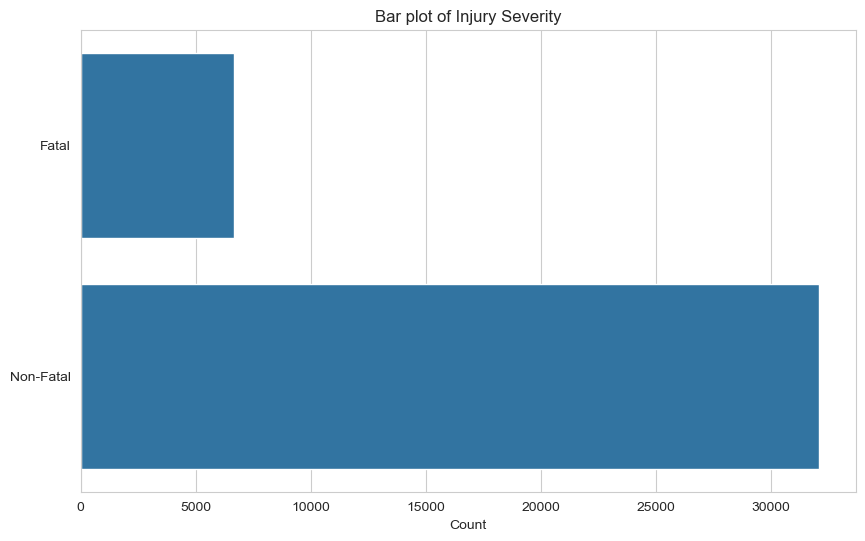

interval columns not set, guessing: ['Number.of.Engines', 'Injury.Target']


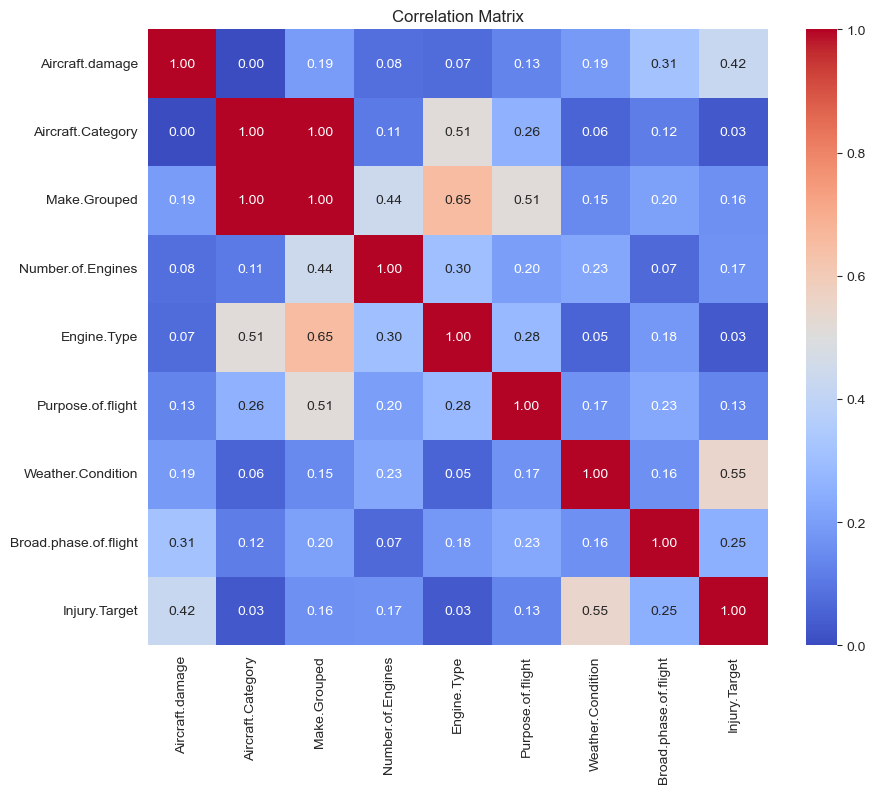

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the CSV file
file_path = '../ADC_fil.csv'
data = pd.read_csv(file_path)

# Define the columns of interest
columns_of_interest = ['Aircraft.damage', 'Aircraft.Category', 'Make.Grouped',
                       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
                       'Weather.Condition', 'Broad.phase.of.flight', 'Injury.Target']

# Create a subset of the data with the columns of interest
subset_data = data[columns_of_interest]

# Plotting individual bar plots for categorical columns
for column in columns_of_interest[:-1]:  # Exclude 'Injury.Target' for now
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=subset_data, order=subset_data[column].value_counts().index)
    plt.title(f'Bar plot of {column}')
    plt.xlabel('Count')
    plt.ylabel('')
    plt.show()

# Plotting individual pie charts for categorical columns
for column in columns_of_interest[:-1]:  # Exclude 'Injury.Target' for now
    plt.figure(figsize=(8, 8))
    subset_data[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie chart of {column}')
    plt.ylabel('')
    plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y='Injury.Severity', data=data)
plt.title(f'Bar plot of Injury Severity')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

# Calculate Phik correlation matrix
phik_correlation = subset_data.phik_matrix()

# Plot the Phik correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(phik_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../ADC_fil.csv')

print(data.head())

  Investigation.Type  Event.Date          Location        Country  \
0           Accident  30-08-1974     Saltville, VA  United States   
1           Accident  02-08-1979        Canton, OH  United States   
2           Accident  01-01-1982       PULLMAN, WA  United States   
3           Accident  01-01-1982  EAST HANOVER, NJ  United States   
4           Accident  01-01-1982         HOBBS, NM  United States   

  Injury.Severity  Injury.Target Aircraft.damage Aircraft.Category    Make  \
0           Fatal              1       Destroyed          Airplane  Cessna   
1           Fatal              1       Destroyed          Airplane  Cessna   
2       Non-Fatal              0     Substantial          Airplane  Cessna   
3       Non-Fatal              0     Substantial          Airplane  Cessna   
4       Non-Fatal              0     Substantial          Airplane   Piper   

  Make.Grouped  ... Amateur.Built Number.of.Engines    Engine.Type  \
0       Cessna  ...            No             

In [4]:
data.shape

(38753, 21)

In [6]:
col = ['Aircraft.damage', 'Aircraft.Category', 'Make.Grouped', 'Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight']

for column in col :
    print(f'Uniques in {column}')
    print(data[column].unique())
    print()

Uniques in Aircraft.damage
['Destroyed' 'Substantial' 'Minor']

Uniques in Aircraft.Category
['Airplane' 'Helicopter']

Uniques in Make.Grouped
['Cessna' 'Piper' 'Beechcraft' 'Bellanca' 'Grumman' 'Air Tractor' 'Mooney'
 'Bell Helicopter' 'Aeronca' 'Robinson' 'Boeing' 'Hughes']

Uniques in Engine.Type
['Reciprocating' 'Turbo Prop' 'Turbo Shaft' 'Turbo Jet' 'Turbo Fan']

Uniques in Purpose.of.flight
['Personal' 'Business' 'Instructional' 'Ferry / Positioning' 'Special Ops'
 'Aerial Application' 'Government Ops']

Uniques in Weather.Condition
['IMC' 'VMC']

Uniques in Broad.phase.of.flight
['Cruise' 'Approach' 'Takeoff' 'Landing' 'Ground']



In [9]:
print(data[col].isnull().sum(axis=0))

Aircraft.damage          0
Aircraft.Category        0
Make.Grouped             0
Engine.Type              0
Purpose.of.flight        0
Weather.Condition        0
Broad.phase.of.flight    0
dtype: int64
